In [1]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import argparse
import segmentation_models as sm

from func import *
from tensorflow.keras.models import load_model

Segmentation Models: using `tf.keras` framework.


In [3]:
def test_generator(image_folder_path, batch_size):              
    """
    Yields the next data batch.
    """
    images = os.listdir(image_folder_path)
    for offset in range(0, len(images), batch_size):
        X_test = []
        batch_images = images[offset:offset+batch_size]    
        for image_name in batch_images:
            image = cv2.imread(f"{image_folder_path}/{image_name}")
            image = cv2.resize(image, (256, 256), interpolation=None)
            X_test.append(image)
        X_test = np.array(X_test)
        yield X_test 

def plotImageWithMask(images, masks, binary=True):
    num_images = len(masks)
    rows = num_images//3
    if binary:
        masks = (masks > 0.5).astype(np.uint8)
    else:
        masks = masks.astype(np.float32)
    fig = plt.figure(figsize=(20, num_images))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # get_pics
    i = 0
    for image, mask in zip(images, masks):
        ax = fig.add_subplot(rows, 6, i + 1, xticks=[], yticks=[])
        ax.imshow(cv2.cvtColor((image/255).astype(np.float32), cv2.COLOR_BGR2RGB))
        ax = fig.add_subplot(rows, 6, i + 2, xticks=[], yticks=[])
        ax.imshow(mask)
        i+=2

In [4]:
test_gen = test_generator("data/train_v2", 48)
X_test = next(test_gen)

In [5]:
model = load_model("models/resnet34", compile=False)
preprocess = sm.get_preprocessing('resnet34')
y_pred = (model.predict(preprocess(X_test)) > 0.2).astype(np.uint8)

2/2 [==============================] - 4s 1s/step


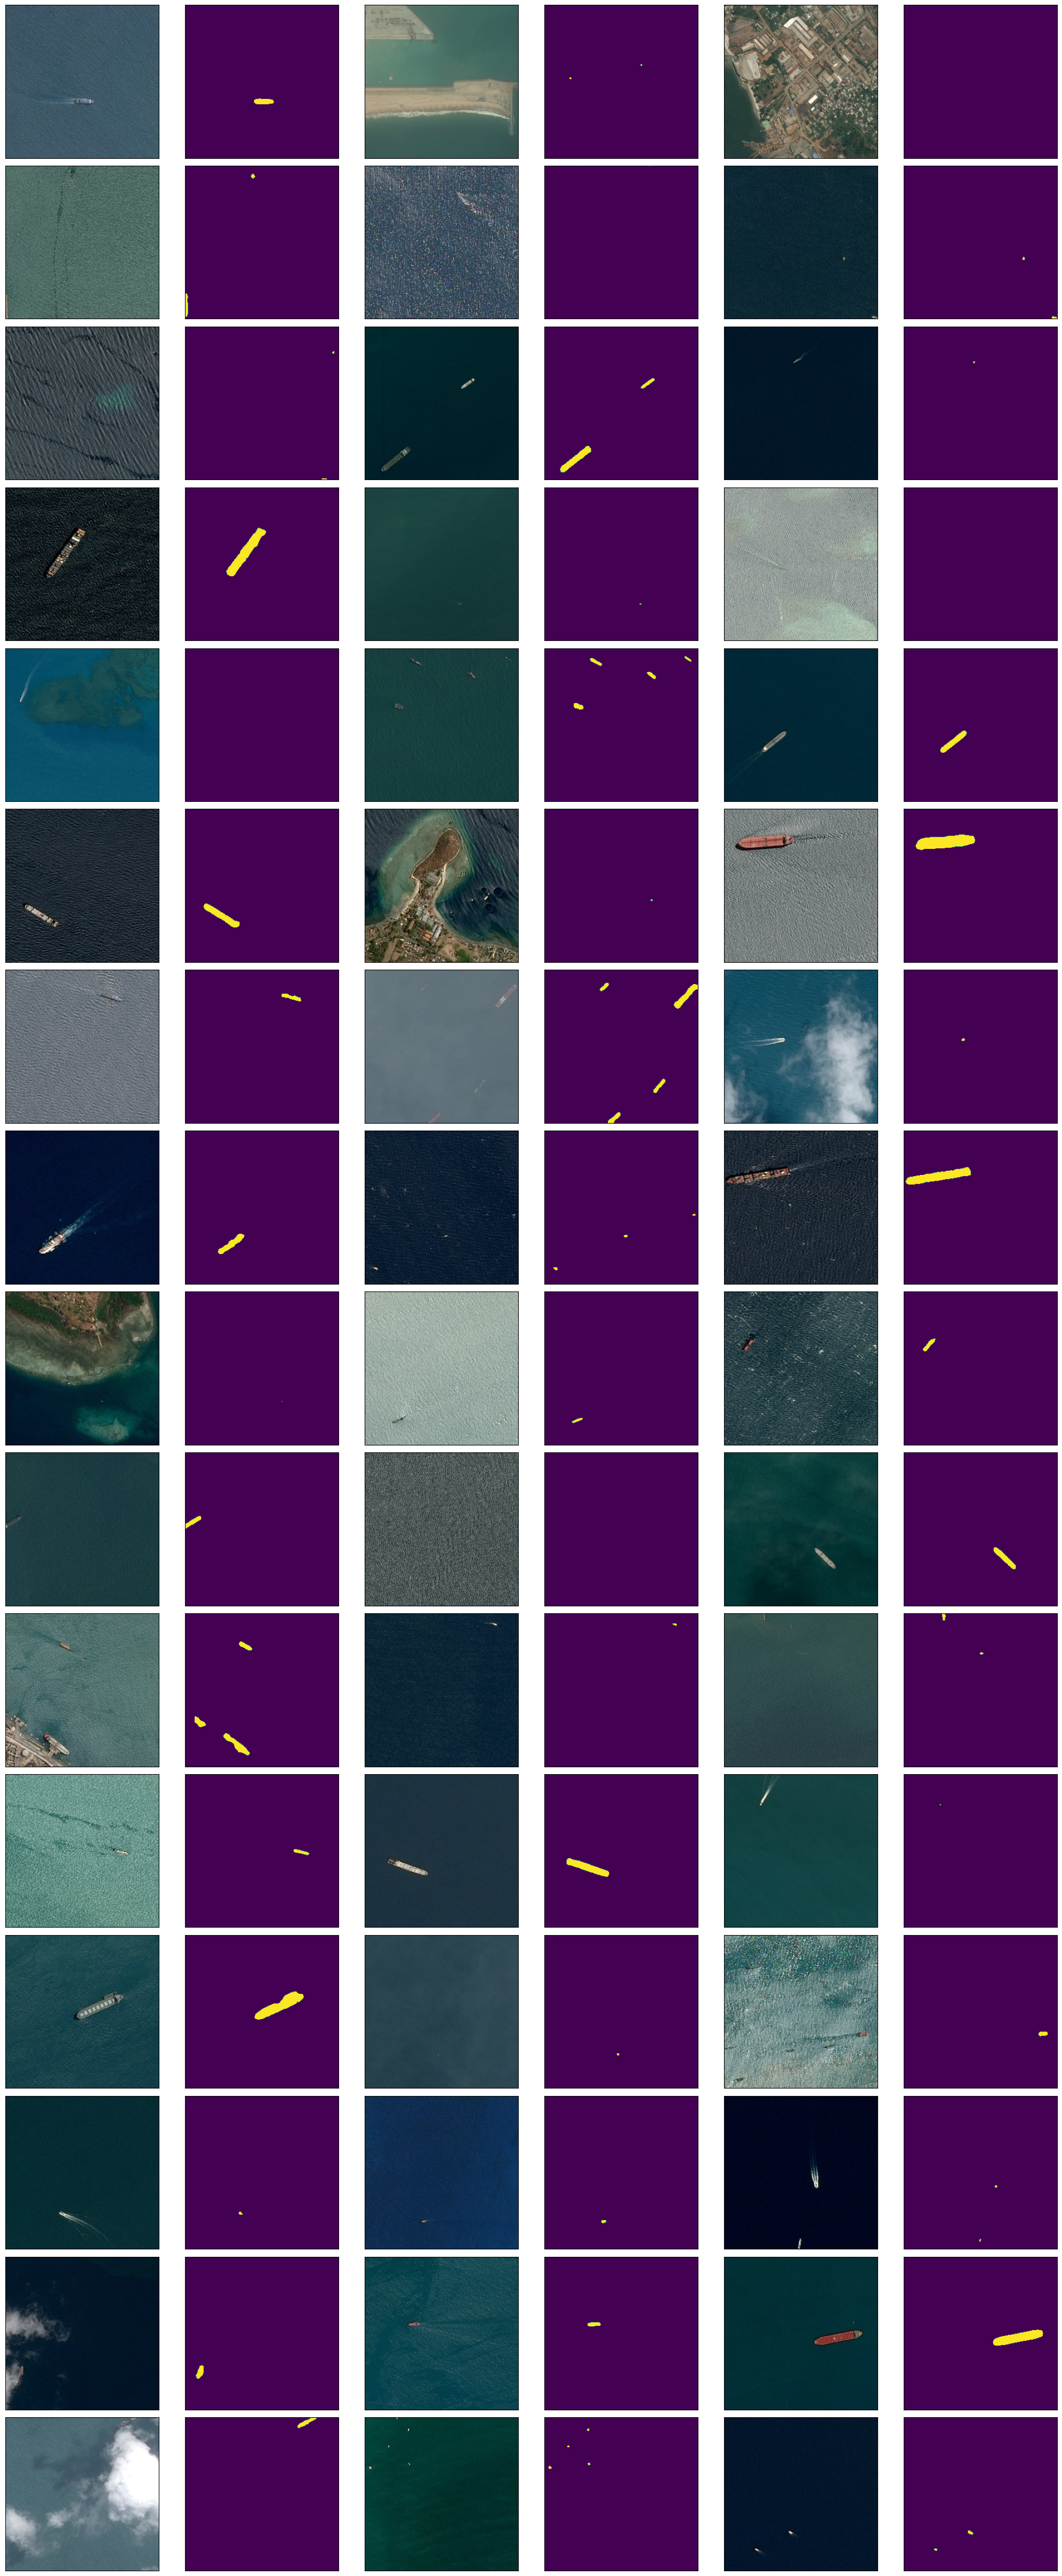

In [6]:
plotImageWithMask(X_test, y_pred, True)